In [1]:
%reset -f

If you require the complete source code or have specific inquiries, please feel free to contact me via email at [w1858682345@163.com].
Thank you for your understanding and cooperation!

In [2]:
import numpy as np
from matplotlib import pyplot as plt


def get_phi(x):  # ok


def get_phi2d(xc, xr):  # ok



def get_psi2d(j, kc, kr, xc, xr):  # ok



def get_idx2d(xc, xr, x_transc, x_transr):  # ok



def func(img, xc, xr, x_transc, x_transr):  # ok



def get_Iwt_l2d(imgl, xc, xr, j):  # ok



def get_Iwt2d(img, xc, xr, j0, J, e):


def get_alpha_jk2d(img, xc, xr, j, kc, kr, u, th):



In [3]:
def show_approx(imgl, approx, indicies, level_points, s=5, cmap='jet', show_2d_points=True, al=0.5):
    xa = np.arange(approx.shape[0])
    ya = np.arange(approx.shape[1])
    xaa, yaa = np.meshgrid(xa, ya)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xaa, yaa, approx.T, cmap='jet', alpha=al)

    idxnp = []
    if level_points == -1 or level_points >= len(indicies):
        for i in indicies:
            idxnp = idxnp + i
    else:
        idxnp = indicies[level_points]
    idxs = np.array(idxnp)
    idxsu = np.unique(idxs, axis=0).T
    idxsut = (idxsu[1,:], idxsu[0,:])
    ax.scatter(xaa[idxsut], yaa[idxsut], approx.T[idxsut], color='black', marker='o', s=2*s)

    ax.set_title('points_num: {}'.format(len(idxnp)))

    plt.figure()
    fig, axs = plt.subplots(1,2)
    axs[0].imshow(approx, cmap=cmap)
    axs[0].set_title('approx_img')
    axs[1].imshow(imgl, cmap=cmap)
    axs[1].set_title('raw_img')
    if show_2d_points:
        if cmap == 'gray':
            color = 'red'
        else:
            color = 'black'
        points = list(zip(idxsut[0], idxsut[1]))
        x1, y1 = zip(*points)
        axs[1].scatter(x1, y1, color=color, s=s)

    plt.show()


def show_3d_points(approx, indicies, level_points=2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    indicieslevel = len(indicies)
    if level_points == -1 or level_points >= len(indicies):
        pass
    else:
        indicies = [indicies[level_points]]
    for idx, i in enumerate(indicies):
        i = np.array(i)
        idxsu = np.unique(i, axis=0).T
        if len(idxsu) == 0:
            continue
        idxsut = (idxsu[1,:], idxsu[0,:])
        xa = np.arange(approx.shape[0])
        ya = np.arange(approx.shape[1])
        xaa, yaa = np.meshgrid(xa, ya)
        amm = np.zeros_like(approx)
        if level_points == -1 or level_points >= indicieslevel:
            d = idx
        else:
            d = level_points
        amm[i[:,0], i[:,1]] = d
        ax.set_xlim([0, approx.shape[0]])
        ax.set_ylim([0, approx.shape[1]])
        ax.set_zlim([0, indicieslevel])
        ax.scatter(xaa[idxsut], yaa[idxsut], amm.T[idxsut], marker='o', s=(indicieslevel-idx+1)*5)
    plt.show()

In [4]:
approx, indicies = get_Iwt2d(imgl, xc, xr, j0, J, e)

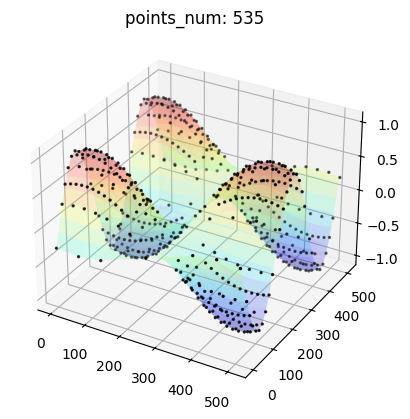

<Figure size 640x480 with 0 Axes>

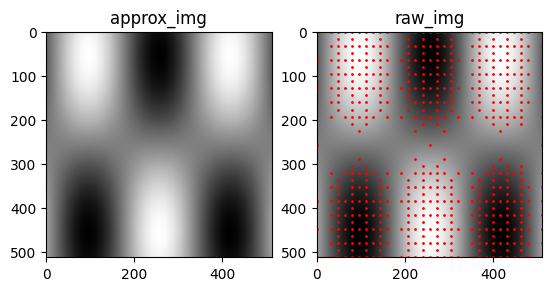

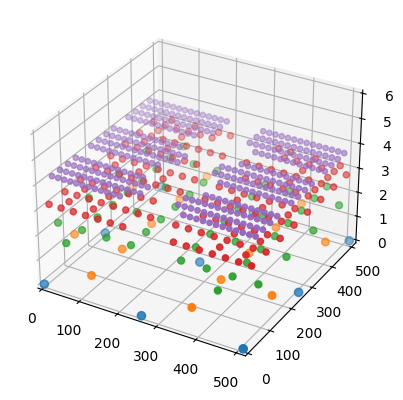

In [6]:
l=-1
show_approx(imgl, approx, indicies, level_points=-1, s=1, cmap='gray', show_2d_points=True, al=0.2)
show_3d_points(approx, indicies, level_points=l)

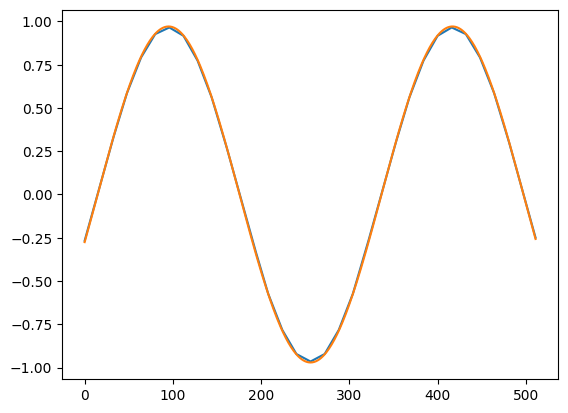

In [7]:
plt.plot(approx[24,:])
plt.plot(imgl[24,:])